## **IMPORTING REQUIRED MODULES**

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from tqdm import tqdm
import numpy as np
from sklearn.cluster import KMeans
import geopy.distance
import pickle
import time
import datetime
from tqdm import tqdm
import math
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
from statistics import mean
from numpy.ma.extras import median

## **READING THE DATA**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Cab Demand Prediction/data/yellow_tripdata_2016-06.csv",index_col=False)
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76


In [ ]:
data.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
11135465,1,2016-06-21 22:08:42,2016-06-21 22:14:09,1,1.20,-73.971756,40.765923,1,N,-73.986893,40.761093,1,6.0,0.5,0.5,3.00,0.0,0.3,10.30
11135466,1,2016-06-21 22:08:42,2016-06-21 22:15:02,1,1.20,-73.989693,40.735512,1,N,-73.979645,40.747814,1,6.5,0.5,0.5,1.55,0.0,0.3,9.35
11135467,1,2016-06-21 22:08:42,2016-06-21 22:22:33,1,2.60,-73.973473,40.763695,1,N,-74.001244,40.743172,1,11.5,0.5,0.5,2.55,0.0,0.3,15.35
11135468,2,2016-06-21 22:08:42,2016-06-21 22:28:08,1,7.80,-73.936806,40.798347,1,N,-73.997818,40.726055,2,24.5,0.5,0.5,0.00,0.0,0.3,25.80
11135469,2,2016-06-21 22:08:42,2016-06-21 22:23:00,1,3.58,-73.991432,40.735260,1,N,-73.984642,40.768871,1,13.0,0.5,0.5,2.86,0.0,0.3,17.16


## **INFERENCE**
The data is temporal in nature. So sequential train-cv-test split would be more meaningful.

In [ ]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [ ]:
data.shape

(11135470, 19)

## **DATA CLEANING AND PROCESSING**

## **ELIMINATING LOCATIONS OUTSIDE NEWYORK (IF ANY)**
Newyork is bounded by the location (40.5774 lat,-74.15 long) & (40.9176 lat,-73.7004 long)

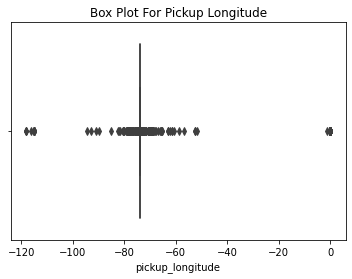

In [ ]:
sb.boxplot(data['pickup_longitude'])
plt.title("Box Plot For Pickup Longitude")
plt.show()

## **INFERENCE**
Clearly We can infer from the box plot that there are pickups beyond the bounded longitudes. 
i.e outside longitude range (-74.15 , -73.7004).

In [ ]:
pu_longs = data['pickup_longitude']
pu_long_err_recs = len(list(filter(lambda x: x>-73.7004 or x<-74.15,pu_longs)))
print("Total Erroneous Records Corresponding to Pickup Longitudes : ",pu_long_err_recs)
print("Percentage of Data records that are to be removed : ",pu_long_err_recs*100/data.shape[0])

Total Erroneous Records Corresponding to Pickup Longitudes :  141755
Percentage of Data records that are to be removed :  1.2730041929078881


## **DATA AFTER CLEANING OUTLIERS CORRESPONDING TO PICKUP LONGITUDE**

In [ ]:
data_2 = data[(data['pickup_longitude']>=-74.15) & (data['pickup_longitude']<=-73.7004)].reset_index(drop=True)
data_2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76


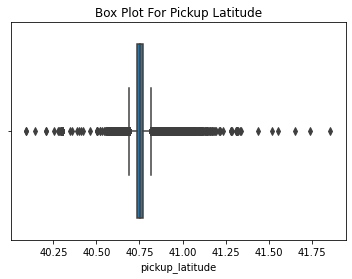

In [ ]:
sb.boxplot(data_2['pickup_latitude'])
plt.title("Box Plot For Pickup Latitude")
plt.show()

## **INFERENCE**
Clearly We can infer from the box plot that there are pickups beyond the bounded latitudes. 
i.e outside latitude range (40.5774 ,40.9176).

In [ ]:
pu_lats = data_2['pickup_latitude']
pu_lat_err_recs = len(list(filter(lambda x: x>40.9176 or x<40.5774,pu_lats)))
print("Total Erroneous Records Corresponding to Pickup Latitudes : ",pu_lat_err_recs)
print("Percentage of Data records that are to be removed : ",pu_lat_err_recs*100/data_2.shape[0])

Total Erroneous Records Corresponding to Pickup Latitudes :  830
Percentage of Data records that are to be removed :  0.007549768208471841


## **DATA AFTER CLEANING OUTLIERS CORRESPONDING TO PICKUP LATITUDE**

In [ ]:
data_3 = data_2[(data_2['pickup_latitude']>=40.5774) & (data_2['pickup_latitude']<=40.9176)].reset_index(drop=True)
data_3.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76


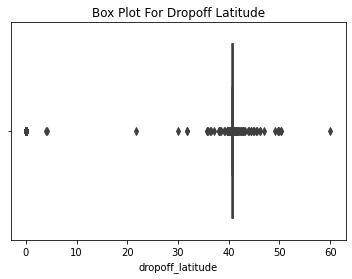

In [ ]:
sb.boxplot(data_3['dropoff_latitude'])
plt.title("Box Plot For Dropoff Latitude")
plt.show()

## **INFERENCE**
Clearly We can infer from the box plot that there are drop offs beyond the bounded latitudes. 
i.e outside latitude range (40.5774 ,40.9176).

In [ ]:
do_lats = data_3['dropoff_latitude']
do_lat_err_recs = len(list(filter(lambda x: x>40.9176 or x<40.5774,do_lats)))
print("Total Erroneous Records Corresponding to Drop-Off Latitudes : ",do_lat_err_recs)
print("Percentage of Data records that are to be removed : ",do_lat_err_recs*100/data_3.shape[0])

Total Erroneous Records Corresponding to Drop-Off Latitudes :  21344
Percentage of Data records that are to be removed :  0.19416195111656312


## **DATA AFTER CLEANING OUTLIERS CORRESPONDING TO DROP-OFF LATITUDE**

In [ ]:
data_4 = data_3[(data_3['dropoff_latitude']>=40.5774) & (data_3['dropoff_latitude']<=40.9176)].reset_index(drop=True)
data_4.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76


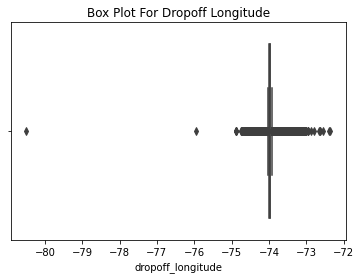

In [ ]:
sb.boxplot(data_4['dropoff_longitude'])
plt.title("Box Plot For Dropoff Longitude")
plt.show()

## **INFERENCE**
Clearly We can infer from the box plot that there are drop-offs beyond the bounded longitudes. 
i.e outside longitude range (-74.15 , -73.7004).

In [ ]:
do_longs = data_4['dropoff_longitude']
do_long_err_recs = len(list(filter(lambda x: x>-73.7004 or x<-74.15,do_longs)))
print("Total Erroneous Records Corresponding to Drop-Off Longitudes : ",do_long_err_recs)
print("Percentage of Data records that are to be removed : ",do_long_err_recs*100/data_4.shape[0])

Total Erroneous Records Corresponding to Drop-Off Longitudes :  25944
Percentage of Data records that are to be removed :  0.23646632683594765


## **DATA AFTER CLEANING OUTLIERS CORRESPONDING TO DROP-OFF LATITUDE**

In [ ]:
data_5 = data_4[(data_4['dropoff_longitude']>=-74.15) & (data_4['dropoff_longitude']<=-73.7004)].reset_index(drop=True)
data_5.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76


In [ ]:
data_5.to_csv("/content/drive/MyDrive/Cab Demand Prediction/data/data_after_latlong_clean.csv",index=False)

## **CHECKING THE VALIDITY OF TRIP DURATIONS**

In [ ]:
data =  pd.read_csv("/content/drive/MyDrive/Cab Demand Prediction/data/data_after_latlong_clean.csv")
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76


In [ ]:
def compute_trip_duration(pt,dt):
  fmt = '%Y-%m-%d %H:%M:%S'
  tstamp1 = datetime.strptime(pt, fmt)
  tstamp2 = datetime.strptime(dt, fmt)
  td = tstamp2 - tstamp1
  return int(round(td.total_seconds() / 60))

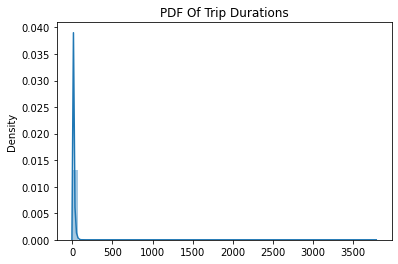

In [ ]:
trip_durations=[]
for i,j in tqdm(zip(data['tpep_pickup_datetime'],data['tpep_dropoff_datetime']),leave=True,position=0):
  trip_durations.append(compute_trip_duration(i,j))
sb.distplot(list(filter(lambda x: x>0,trip_durations)))
plt.title("PDF Of Trip Durations")
plt.show()

## **INFERENCE**

As per NYC regulations any taxi trip in the city should be completed within 720 minutes. It is clearly evident from the PDF that there are values greater than 720 and also less than 0 which is meaning less. So we remove those rows from the data considering them as outliers.

## **REMOVING RECORDS WITH INVALID TRIP DURATIONS**

In [ ]:
data['trip_duration'] = trip_durations

In [ ]:
print("\n\n\t\t\t\t\tData After Adding 'trip_duration' as New Column\n\n")
data.head()



					Data After Adding 'trip_duration' as New Column




,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,7
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30,29
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,7
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30,30
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76,17


In [ ]:
data.shape

(10945597, 20)

In [ ]:
trip_dur_err_rec = len(list(filter(lambda x: x>720 or x<=0, trip_durations)))
print("Total Erroneous Records Corresponding to Trip durations : ",trip_dur_err_rec)
print("Percentage of Data records that are to be removed : ",trip_dur_err_rec*100/data.shape[0])

Total Erroneous Records Corresponding to Trip durations :  55032
Percentage of Data records that are to be removed :  0.502777509531915


In [ ]:
data_2 = data[(data['trip_duration']>0) & (data['trip_duration']<721)].reset_index(drop=True)
data_2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,7
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30,29
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,7
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30,30
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76,17


In [ ]:
#data_2.to_csv("/content/drive/MyDrive/Cab Demand Prediction/data/data_after_tripdur_clean.csv",index=False)

## **CHECKING THE VALIDITY OF CAB SPEEDS**

In [ ]:
data_2 = pd.read_csv("/content/drive/MyDrive/Cab Demand Prediction/data/data_after_tripdur_clean.csv")
data_2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,7
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30,29
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,7
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30,30
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76,17


In [ ]:
data_2.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'trip_duration'],
      dtype='object')

In [ ]:
data_2['cab_speed'] = data_2['trip_distance'].values*60/data_2['trip_duration'].values
print("\n\n\t\t\t\t\tData After Adding 'cab_speed (miles/hr)' as New Column\n\n")
data_2.head()



					Data After Adding 'cab_speed (miles/hr)' as New Column




,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,cab_speed
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,7,6.771429
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30,29,10.800000
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,7,10.800000
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30,30,14.780000
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76,17,10.941176


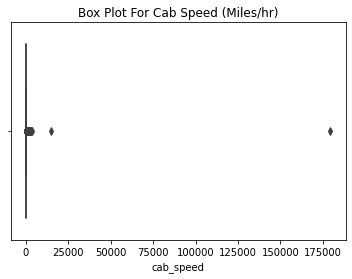

In [ ]:
sb.boxplot(data_2['cab_speed'])
plt.title("Box Plot For Cab Speed (Miles/hr)")
plt.show()

## **INFERENCE**

The Box-Plot clearly indicates that there are some outliers in the data set corresponding to Cab speeds.

## **REMOVING OUTLIERS CORRESPONDING TO CAB SPEEDS**

In [ ]:
def get_percentile_values(data,feature):
  print("25th percentile value in {} :: {}".format(feature,np.percentile(data[feature],25)))
  print("50th percentile value in {} :: {}".format(feature,np.percentile(data[feature],50)))
  print("75th percentile value in {} :: {}".format(feature,np.percentile(data[feature],75)))
  print("90th percentile value in {} :: {}".format(feature,np.percentile(data[feature],90)))
  for i in range(91,100):
    print("{}th percentile value in {} :: {}".format(i,feature,np.percentile(data[feature],i)))
  i=99.10
  while(i<100):
      print("{}th percentile value in {} :: {}".format(i,feature,np.percentile(data[feature],i)))
      i=round(i+0.10,1)
  i = 99.90
  while(i<100):
      print("{}th percentile value in {} :: {}".format(i,feature,np.percentile(data[feature],i)))
      i=round(i+0.01,2)
  print("100th percentile value in {} :: {}".format(feature,np.percentile(data[feature],100)))

In [ ]:
get_percentile_values(data_2,'cab_speed')

25th percentile value in cab_speed :: 7.38
50th percentile value in cab_speed :: 10.200000000000001
75th percentile value in cab_speed :: 14.0
90th percentile value in cab_speed :: 19.153846153846157
91th percentile value in cab_speed :: 19.8
92th percentile value in cab_speed :: 20.52
93th percentile value in cab_speed :: 21.333333333333332
94th percentile value in cab_speed :: 22.32
95th percentile value in cab_speed :: 23.542105263157897
96th percentile value in cab_speed :: 24.868965517241378
97th percentile value in cab_speed :: 26.75
98th percentile value in cab_speed :: 29.28
99th percentile value in cab_speed :: 33.31034482758621
99.1th percentile value in cab_speed :: 33.9375
99.2th percentile value in cab_speed :: 34.61538461538461
99.3th percentile value in cab_speed :: 35.4
99.4th percentile value in cab_speed :: 36.1764705882353
99.5th percentile value in cab_speed :: 37.18181818181818
99.6th percentile value in cab_speed :: 38.35
99.7th percentile value in cab_speed :: 39

In [ ]:
err_rec_cabspeed = len(list(filter(lambda x: x>54.347888144813645 or x<1,data_2['cab_speed'])))
print("Total Erroneous Records Corresponding to Cab Speeds : ",err_rec_cabspeed)
print("Percentage of Data records that are to be removed : ",err_rec_cabspeed*100/data_2.shape[0])

Total Erroneous Records Corresponding to Cab Speeds :  29820
Percentage of Data records that are to be removed :  0.27381499490614125


In [ ]:
data_3 = data_2[(data_2['cab_speed']>=1) & (data_2['cab_speed']<=54.347888144813645)].reset_index(drop=True)
data_3.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,cab_speed
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,7,6.771429
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30,29,10.800000
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,7,10.800000
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30,30,14.780000
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76,17,10.941176


In [ ]:
print("The Average Cab Speed ::",round(sum(data_3['cab_speed'])/len(data_3['cab_speed'])),"miles/hr")

The Average Cab Speed :: 12 miles/hr


In [ ]:
#data_3.to_csv("/content/drive/MyDrive/Cab Demand Prediction/data/data_after_cabspeed_clean.csv",index=False)

## **CHECKING THE VALIDITY OF TRIP DISTANCES**

In [ ]:
data_3 = pd.read_csv("/content/drive/MyDrive/Cab Demand Prediction/data/data_after_cabspeed_clean.csv")
data_3.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,cab_speed
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,7,6.771429
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30,29,10.800000
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,7,10.800000
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30,30,14.780000
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76,17,10.941176


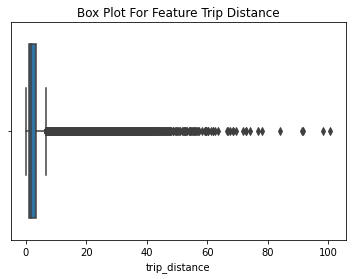

In [ ]:
sb.boxplot(data_3['trip_distance'])
plt.title("Box Plot For Feature Trip Distance")
plt.show()

## **INFERENCE**
The 25th,50th,75th percentiles of trip distance feature are very close to each other. So we can expect some outliers in this feature.

## **REMOVING OUTLIERS CORRESPONDING TO TRIP DISTANCE**

In [ ]:
get_percentile_values(data_3,'trip_distance')

25th percentile value in trip_distance :: 1.02
50th percentile value in trip_distance :: 1.73
75th percentile value in trip_distance :: 3.22
90th percentile value in trip_distance :: 6.98
91th percentile value in trip_distance :: 7.62
92th percentile value in trip_distance :: 8.4
93th percentile value in trip_distance :: 9.1
94th percentile value in trip_distance :: 9.8
95th percentile value in trip_distance :: 10.6
96th percentile value in trip_distance :: 11.69
97th percentile value in trip_distance :: 13.9
98th percentile value in trip_distance :: 16.97
99th percentile value in trip_distance :: 18.5
99.1th percentile value in trip_distance :: 18.7
99.2th percentile value in trip_distance :: 18.95
99.3th percentile value in trip_distance :: 19.2
99.4th percentile value in trip_distance :: 19.51
99.5th percentile value in trip_distance :: 19.9
99.6th percentile value in trip_distance :: 20.4
99.7th percentile value in trip_distance :: 20.9
99.8th percentile value in trip_distance :: 2

In [ ]:
err_rec_tripdist = len(list(filter(lambda x: x>30 or x<=0,data_3['trip_distance'])))
print("Total Erroneous Records Corresponding to Trip Distances : ",err_rec_tripdist)
print("Percentage of Data records that are to be removed : ",err_rec_tripdist*100/data_3.shape[0])

Total Erroneous Records Corresponding to Trip Distances :  1075
Percentage of Data records that are to be removed :  0.009898031856930625


In [ ]:
data_4 = data_3[(data_3['trip_distance']>0) & (data_3['trip_distance']<=30)].reset_index(drop=True)
data_4.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,cab_speed
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,7,6.771429
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30,29,10.800000
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,7,10.800000
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30,30,14.780000
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76,17,10.941176


In [ ]:
#data_4.to_csv("/content/drive/MyDrive/Cab Demand Prediction/data/data_after_tripdist_clean.csv",index=False)

## **CHECKING THE VALIDITY OF FARE AMOUNTS**

In [ ]:
data_4 = pd.read_csv("/content/drive/MyDrive/Cab Demand Prediction/data/data_after_tripdist_clean.csv")
data_4.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,cab_speed
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,7,6.771429
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30,29,10.800000
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,7,10.800000
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30,30,14.780000
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76,17,10.941176


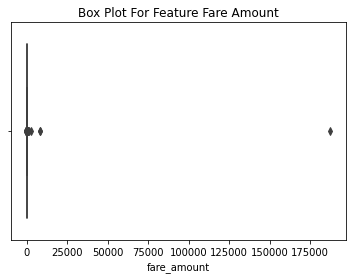

In [ ]:
sb.boxplot(data_4['fare_amount'])
plt.title("Box Plot For Feature Fare Amount")
plt.show()

In [ ]:
get_percentile_values(data_4,'fare_amount')

25th percentile value in fare_amount :: 6.5
50th percentile value in fare_amount :: 10.0
75th percentile value in fare_amount :: 15.0
90th percentile value in fare_amount :: 25.5
91th percentile value in fare_amount :: 27.0
92th percentile value in fare_amount :: 28.5
93th percentile value in fare_amount :: 30.5
94th percentile value in fare_amount :: 32.5
95th percentile value in fare_amount :: 35.5
96th percentile value in fare_amount :: 39.0
97th percentile value in fare_amount :: 45.5
98th percentile value in fare_amount :: 52.0
99th percentile value in fare_amount :: 52.0
99.1th percentile value in fare_amount :: 52.0
99.2th percentile value in fare_amount :: 52.0
99.3th percentile value in fare_amount :: 52.0
99.4th percentile value in fare_amount :: 52.0
99.5th percentile value in fare_amount :: 52.0
99.6th percentile value in fare_amount :: 52.0
99.7th percentile value in fare_amount :: 53.0
99.8th percentile value in fare_amount :: 56.5
99.9th percentile value in fare_amount :

## **REMOVING OUTLIERS CORRESPONDING TO FARE AMOUNT**

In [ ]:
err_rec_fareamt = len(list(filter(lambda x: x>100 or x<=0,data_4['fare_amount'])))
print("Total Erroneous Records Corresponding to Fare Amount : ",err_rec_fareamt)
print("Percentage of Data records that are to be removed : ",err_rec_fareamt*100/data_4.shape[0])

Total Erroneous Records Corresponding to Fare Amount :  5115
Percentage of Data records that are to be removed :  0.047100878755984295


In [ ]:
data_5 = data_4[(data_4['fare_amount']>0) & (data_4['fare_amount']<=100)].reset_index(drop=True)
data_5.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,cab_speed
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,7,6.771429
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30,29,10.800000
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,7,10.800000
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30,30,14.780000
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76,17,10.941176


In [ ]:
#data_5.to_csv("/content/drive/MyDrive/Cab Demand Prediction/data/cleaned_data.csv",index=False)

## **DATA PREPERATION (REGIONS CLUSTERING)**

In [ ]:
cdata = pd.read_csv("/content/drive/MyDrive/Cab Demand Prediction/data/cleaned_data.csv")
cdata.shape

(10854555, 21)

In [ ]:
cdata.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,cab_speed
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,7,6.771429
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30,29,10.800000
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,7,10.800000
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30,30,14.780000
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76,17,10.941176


## **ELBOW METHOD TO DETERMINE OPTIMAL-K**

In [ ]:
for cc in range(10,61,10):
  kmeans = KMeans(n_clusters=cc, random_state=0)
  kmeans.fit(cdata[['pickup_latitude','pickup_longitude']].values)
  centres = kmeans.cluster_centers_
  micd = 100
  favclus = 0
  for i in centres:
    for j in centres:
      if np.array_equal(i,j) == False:
        dist = geopy.distance.vincenty(i,j).miles
        if dist<micd:
          micd = dist
        if 0.5<=dist<=2:
          favclus+=1
  print("If Number of Clusters = {} Then,\nMinimum Inter Cluster Distance = {} ; % of Clusters within the vicinity = {}".
        format(cc,micd,favclus*100/(cc*(cc-1)/2)))
  print("="*128)

If Number of Clusters = 10 Then,
Minimum Inter Cluster Distance = 0.971344561613067 ; % of Clusters within the vicinity = 35.55555555555556
If Number of Clusters = 20 Then,
Minimum Inter Cluster Distance = 0.7218028077681672 ; % of Clusters within the vicinity = 42.10526315789474
If Number of Clusters = 30 Then,
Minimum Inter Cluster Distance = 0.4644664351008461 ; % of Clusters within the vicinity = 47.81609195402299
If Number of Clusters = 40 Then,
Minimum Inter Cluster Distance = 0.45540587415265227 ; % of Clusters within the vicinity = 43.333333333333336
If Number of Clusters = 50 Then,
Minimum Inter Cluster Distance = 0.42479941565475654 ; % of Clusters within the vicinity = 41.46938775510204
If Number of Clusters = 60 Then,
Minimum Inter Cluster Distance = 0.31294497764335827 ; % of Clusters within the vicinity = 43.61581920903955


## **FITTING K-MEANS WITH OPTIMAL-K**

In [ ]:
kmeans_30 = KMeans(n_clusters=30, random_state=0)
kmeans_30.fit(cdata[['pickup_latitude','pickup_longitude']].values)
regions = kmeans_30.predict(cdata[['pickup_latitude','pickup_longitude']].values)
cdata['Region'] = regions
cdata.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,cab_speed,Region
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,7,6.771429,22
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30,29,10.800000,16
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,7,10.800000,20
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30,30,14.780000,15
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76,17,10.941176,14


In [ ]:
#cdata.to_csv("/content/drive/MyDrive/Cab Demand Prediction/data/data_after_clustering.csv",index=False)

## **PICKLING THE K-MEANS MODEL**

In [ ]:
'''model = open('/content/drive/MyDrive/Cab Demand Prediction/kmeans_model.pkl', 'wb') 
pickle.dump(kmeans_30, model)                     
model.close()'''

## **SCATTER PLOT OF CLUSTERED REGIONS**

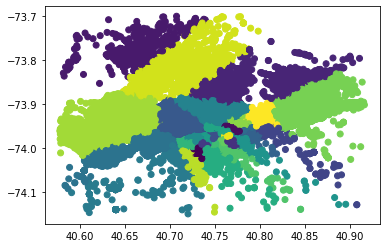

In [ ]:
plt.scatter(cdata['pickup_latitude'],cdata['pickup_longitude'],c=cdata['Region'])
plt.show()

## **CONVERTING THE PICKUP TIMES INTO UNIX TIME STAMP**

#### **This gives us the total seconds lapsed till the given date starting from Jan 1st 1970. This is a featurization technique generally used for time stamp data**

In [ ]:
cdata = pd.read_csv("/content/drive/MyDrive/Cab Demand Prediction/data/data_after_clustering.csv")
cdata.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,cab_speed,Region
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,7,6.771429,22
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30,29,10.800000,16
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,7,10.800000,20
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30,30,14.780000,15
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76,17,10.941176,14


In [ ]:
def unix_time_stamp(t):
  return time.mktime(datetime.datetime.strptime(t, "%Y-%m-%d %H:%M:%S").timetuple())

In [ ]:
cdata['pickup_unix'] = cdata['tpep_pickup_datetime'].apply(unix_time_stamp)
cdata.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,cab_speed,Region,pickup_unix
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,7,6.771429,22,1.465506e+09
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30,29,10.800000,16,1.465506e+09
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,7,10.800000,20,1.465506e+09
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30,30,14.780000,15,1.465506e+09
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76,17,10.941176,14,1.465506e+09


## **CREATING TIME BINS**
#### **We substract the "unix time-stamp of 1st date of the pick-up month of pick-up year(2016-06-01)" from "pick-up unix time-stamp (timestamp from Jan 1st 1970)" then divide the result by 600 to get the 10min Bin number**

In [ ]:
first_jun_time_stamp = time.mktime(datetime.datetime.strptime("2016-06-01 00:00:00", "%Y-%m-%d %H:%M:%S").timetuple())
def compute_time_bins(t):
  return(t-first_jun_time_stamp)//600
cdata['time_bins'] = cdata['pickup_unix'].apply(compute_time_bins)
cdata.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,cab_speed,Region,pickup_unix,time_bins
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,7,6.771429,22,1.465506e+09,1278.0
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30,29,10.800000,16,1.465506e+09,1278.0
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,7,10.800000,20,1.465506e+09,1278.0
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30,30,14.780000,15,1.465506e+09,1278.0
4,2,2016-06-09 21:06:36,2016-06-09 21:23:23,1,3.10,-73.987106,40.733173,1,N,-73.985909,40.766445,1,13.5,0.5,0.5,2.96,0.0,0.3,17.76,17,10.941176,14,1.465506e+09,1278.0


## **SEPERATING OUT REQUIRED COLUMNS AND COMPUTING PICKUPS COUNT**

In [ ]:
cdata = pd.read_csv("/content/drive/MyDrive/Cab Demand Prediction/data/final_df.csv")
cdata['num_pickups'] = " "
data_with_pickups = cdata[['Region','time_bins','num_pickups']].groupby(['Region','time_bins']).count()
data_with_pickups.head()

num_pickups
Region time_bins             
0      0.0                 80
       1.0                 89
       2.0                 76
       3.0                 65
       4.0                 59

In [ ]:
#data_with_pickups.to_csv("/content/drive/MyDrive/Cab Demand Prediction/data/data_with_pickups.csv")

## **FINDING OUT ZERO PICKUPS AND ADDING THOSE ROWS IN THE DATA FOR SMOOTHING PURPOSE**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Cab Demand Prediction/data/data_with_pickups.csv")
data.head()

,Region,time_bins,num_pickups
0,0,0.0,80
1,0,1.0,89
2,0,2.0,76
3,0,3.0,65
4,0,4.0,59


In [ ]:
not_available=[]
available = []
for i,j in zip(data['Region'],data['time_bins']):
    available.append((i,j))
for i in tqdm(range(30)):
  for j in range(4320):
    if (i,j) not in available:
      not_available.append((i,j,0))

100%|██████████| 30/30 [04:17<00:00,  8.60s/it]


In [ ]:
data_all_bin_pickups = pd.concat([data, pd.DataFrame(not_available,columns=['Region','time_bins','num_pickups'])], axis=0).sort_values(by=['Region','time_bins']).reset_index(drop=True)
data_all_bin_pickups.head()

,Region,time_bins,num_pickups
0,0,0.0,80
1,0,1.0,89
2,0,2.0,76
3,0,3.0,65
4,0,4.0,59


In [ ]:
#data_all_bin_pickups.to_csv("/content/drive/MyDrive/Cab Demand Prediction/data/data_incldng_zero_pickups.csv",index=False)

## **TRAIN-CV-TEST SPLIT**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Cab Demand Prediction/data/data_incldng_zero_pickups.csv")
data.head()

,Region,time_bins,num_pickups
0,0,0.0,80
1,0,1.0,89
2,0,2.0,76
3,0,3.0,65
4,0,4.0,59


In [ ]:
cv_data = pd.DataFrame(columns=['Region','time_bins','num_pickups'])
test_data = pd.DataFrame(columns=['Region','time_bins','num_pickups'])
train_data = pd.DataFrame(columns=['Region','time_bins','num_pickups'])
for i in range(30):
  
  df = data[(data['Region']==i)]
  
  test_data = pd.concat([test_data,df.tail(50)],axis=0).reset_index(drop=True) # creating test data
  df.drop(df.tail(50).index,inplace=True)

  cv_data = pd.concat([cv_data,df.tail(50)],axis=0).reset_index(drop=True) # creating cv data
  df.drop(df.tail(50).index,inplace=True)

  train_data = pd.concat([train_data,df],axis=0).reset_index(drop=True) # creating train data

#### **From each cluster(total-30) the last 100 data points (50 for CV , 50 for Test) have been dedicated for model evaluation purposes**

In [ ]:
train_data.shape,cv_data.shape,test_data.shape

((126600, 3), (1500, 3), (1500, 3))

## **SMOOTHING THE DATA**

#### **Some Regions/clusters might not have any pickups for a particular time-bin. That zero value need to be smoothed to have a non-zero value. Because with these zero values ratio based techniques might yield division by zero error. It should be done only on Training Data**

## **CHECKING FOR THE EXISTENCE OF ZERO PICKUPS BY PLOTTING THE TRAINING DATA**

In [ ]:
def plot_data(frame):
  for reg in range(0,30):
    plt.figure(figsize=(20,4))
    plt.title("Data of Pick-ups Demanded For Region - {}".format(reg))
    plt.axhspan(0,0,color='red',alpha=100)
    plt.plot(frame[(frame['Region']==reg)]['time_bins'],frame[(frame['Region']==reg)]['num_pickups'])
    plt.xlabel("Tim Bins")
    plt.ylabel("Num of Pickups")
    for i,j in zip(frame[(frame['Region']==reg)]['time_bins'],frame[(frame['Region']==reg)]['num_pickups']):
      if j == 0:
        plt.annotate("0",(i,j))
    plt.show()

In [ ]:
plot_data(train_data)

Output hidden; open in https://colab.research.google.com to view.

## **PERFORMING SMOOTHING (SHOULD BE DONE ONLY FOR TRAINING DATA)**

In [ ]:
data_after_smoothing = train_data.copy()
data_after_smoothing.head()

,Region,time_bins,num_pickups
0,0,0.0,80
1,0,1.0,89
2,0,2.0,76
3,0,3.0,65
4,0,4.0,59


In [ ]:
for i in range(data_after_smoothing.shape[0]):
  if data_after_smoothing['num_pickups'][i] == 0:
    first_non_zero_index = i-1
    second_non_zero_index = i+1
    while(data_after_smoothing['num_pickups'][second_non_zero_index]==0):
      second_non_zero_index=second_non_zero_index+1
    numerator = sum(data_after_smoothing['num_pickups'][first_non_zero_index:second_non_zero_index+1])
    denominator = len(data_after_smoothing['num_pickups'][first_non_zero_index:second_non_zero_index+1])
    smoothed_val = math.ceil(numerator/denominator)
    for ind in range(first_non_zero_index+1,second_non_zero_index):
      data_after_smoothing['num_pickups'][ind] = smoothed_val

## **PLOTTING THE DATA AFTER SMOOTHING**

In [ ]:
plot_data(data_after_smoothing)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#data_after_smoothing.to_csv("/content/drive/MyDrive/Cab Demand Prediction/data/train_data_after_smoothing.csv",index=False)
#cv_data.to_csv("/content/drive/MyDrive/Cab Demand Prediction/data/cv_data.csv",index=False)
#test_data.to_csv("/content/drive/MyDrive/Cab Demand Prediction/data/test_data.csv",index=False)

## **LOADING TRAIN-CV-TEST DATASETS**

In [2]:
train_data = pd.read_csv("/content/drive/MyDrive/Cab Demand Prediction/data/train_data_after_smoothing.csv")
cv_data = pd.read_csv("/content/drive/MyDrive/Cab Demand Prediction/data/cv_data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Cab Demand Prediction/data/test_data.csv")

## **APPLYING SMA(SIMPLE MOVING AVERAGE ON PREVIOUS VALUES) TECHNIQUE**

In SMA, For a particular cluster - The current demand is predicted by considereing the average of previous "K" demands. Optimal 'K' is determined using held-out set.

## **FINDING OPTIMAL WINDOW SIZE FOR SMA (PREVIOUS VALUES)**

In [ ]:
def compute_mapes(data,low_k,high_k):
  k_val,mapes = [],[]
  for wsize in tqdm(range(low_k,high_k+1)): # Trying out various "K" values 
    k_val.append(wsize)
    mape_clusters_wise_per_k = []
    for cnum in range(30): # calculating MAPE cluster-wise
      gt_values = data[(data['Region'])==cnum]['num_pickups'].values.tolist() #Kth cluster GTs
      pred_temp = data[(data['Region'])==cnum]['num_pickups'].rolling(window=wsize).mean().shift(1).values.tolist()
      pred_values = gt_values[0:wsize]+pred_temp[wsize:]
      # first 'wsize' values will have 'NaN' so we replace them with original values itself...
      mape_clusters_wise_per_k.append(mean_absolute_percentage_error(gt_values,pred_values)) #Kth cluster MAPE
    mapes.append(mean(mape_clusters_wise_per_k)) #mape for given "k" is mean of mape's of all 30 clusters
  return k_val,mapes

100%|██████████| 50/50 [00:06<00:00,  7.33it/s]


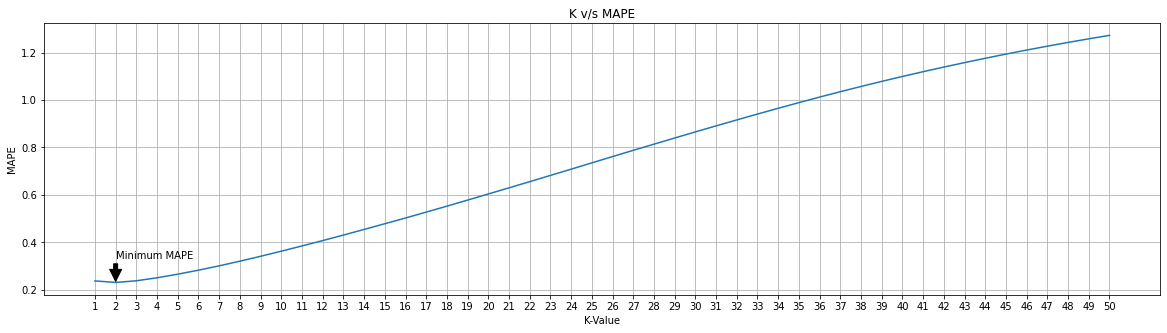

In [ ]:
train_kval,train_mape = compute_mapes(train_data,1,50)
plt.figure(figsize=(20,5))
plt.title("K v/s MAPE")
plt.xticks(train_kval)
plt.xlabel("K-Value")
plt.ylabel("MAPE")
plt.plot(train_kval,train_mape)
plt.grid()
ymin = min(train_mape)
xpos = train_mape.index(ymin)
xmax = train_kval[xpos]
plt.annotate('Minimum MAPE', xy=(xmax, ymin), xytext=(xmax, ymin+0.1),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

#### **OPTIMAL-WINOW SIZE = 2**

#### **COMBINING THE DATAFRAMES AFTER TRAIN DATA SMOOTHING**

In [ ]:
total_data = pd.DataFrame()
for i in range(30):
  total_data = pd.concat([total_data,pd.concat([train_data[(train_data['Region'])==i],
             cv_data[(cv_data['Region'])==i],test_data[(test_data['Region'])==i]],ignore_index=True)],ignore_index=True)

In [ ]:
sma_predictions = []
mapes = []
for cnum in range(30):
  gt_values = total_data[(total_data['Region'])==cnum]['num_pickups'].values.tolist() #Kth cluster GTs
  pred_temp = total_data[(total_data['Region'])==cnum]['num_pickups'].rolling(window=2).mean().shift(1).values.tolist()
  pred_values = gt_values[0:2]+pred_temp[2:]
  sma_predictions = sma_predictions+pred_values
  mapes.append(mean_absolute_percentage_error(gt_values,pred_values))
print("Overall MAPE for SMA Predictions : ",median(mapes))

Overall MAPE for SMA Predictions :  0.17922038949908353


In [ ]:
total_data['sma_predictions'] = sma_predictions
total_data

,Region,time_bins,num_pickups,sma_predictions
0,0,0.0,80,80.0
1,0,1.0,89,89.0
2,0,2.0,76,84.5
3,0,3.0,65,82.5
4,0,4.0,59,70.5
...,...,...,...,...
129595,29,4315.0,12,15.5
129596,29,4316.0,25,14.5
129597,29,4317.0,22,18.5
129598,29,4318.0,23,23.5


In [ ]:
#total_data.to_csv("/content/drive/MyDrive/Cab Demand Prediction/data/data_with_sma_preds.csv",index=False)

## **FINDING OPTIMAL-K FOR WEIGHTED MOVING AVERAGE TECHNIQUE**

In [3]:
total_data = pd.read_csv("/content/drive/MyDrive/Cab Demand Prediction/data/data_with_sma_preds.csv")

In [76]:
def optimal_k_for_wma(data,N_list):
  preds_final=[]
  for N in tqdm(N_list):#For the given 'N'
    preds_per_entire_column=[]
    denominator = N*(N+1)/2
    wt_mtx = np.arange(1,N+1)
    for cnum in range(30): # For each cluster
      pickups_gt = data[(data['Region'])==cnum]['num_pickups'].values.tolist()
      low = 0
      preds_per_entire_column+=pickups_gt[0:N]
      for high in range(N,len(pickups_gt)): 
        preds_temp = pickups_gt[low:high] #Taking pickup values from Ground Truth
        preds_per_entire_column.append(sum(preds_temp * wt_mtx)/denominator)
        low+=1
      #print(len(preds_per_entire_column))
    preds_final.append(preds_per_entire_column)
  return preds_final #this contains 9 sub lits where each list is every prediction column for N from 2 to 10.

In [77]:
preds_final_wma = optimal_k_for_wma(pd.concat([train_data,cv_data]).reset_index(drop=True),range(2,11))

100%|██████████| 9/9 [00:14<00:00,  1.56s/it]


In [79]:
n_val = [i for i in range(2,11)]
actual = list(pd.concat([train_data,cv_data]).reset_index(drop=True)['num_pickups'].values)
mdape = [np.median((np.abs(np.subtract(actual,preds_final_wma[i])/preds_final_wma[i]))) * 100 for i in range(9)]

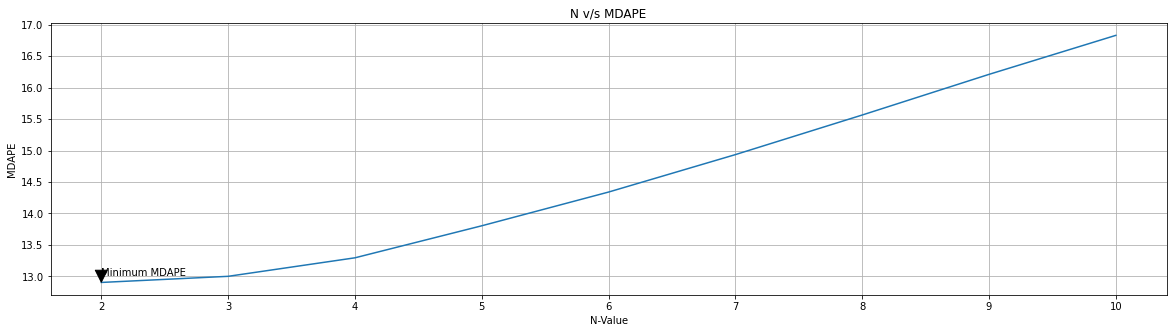

In [80]:
plt.figure(figsize=(20,5))
plt.title("N v/s MDAPE")
plt.xticks(n_val)
plt.xlabel("N-Value")
plt.ylabel("MDAPE")
plt.plot(n_val,mdape)
plt.grid()
ymin = min(mdape)
xpos = mdape.index(ymin)
xmax = n_val[xpos]
plt.annotate('Minimum MDAPE', xy=(xmax, ymin), xytext=(xmax, ymin+0.1),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

## **SAVING PREDICTIONS OF WEIGHTED MOVING AVERAGE WITH OPTIMAL N**

In [ ]:
total_data['wma_predictions'] = preds_final_wma[0]
total_data

,Region,time_bins,num_pickups,sma_predictions,wma_predictions
0,0,0.0,80,80.0,80.000000
1,0,1.0,89,89.0,89.000000
2,0,2.0,76,84.5,86.000000
3,0,3.0,65,82.5,80.333333
4,0,4.0,59,70.5,68.666667
...,...,...,...,...,...
129595,29,4315.0,12,15.5,16.000000
129596,29,4316.0,25,14.5,13.666667
129597,29,4317.0,22,18.5,20.666667
129598,29,4318.0,23,23.5,23.000000


In [ ]:
#total_data.to_csv("/content/drive/MyDrive/Cab Demand Prediction/data/data_with_sma_wma_preds.csv",index=False)

## **APPLYING EXPONENTIAL WEIGHTED MOVING AVERAGE APPROACH**

### **FINDING OPTIMAL ALPHA USING ELBOW METHOD**

In [57]:
def optimal_alpha_for_ewma(data,alpha_list):
  preds_final=[]
  for alpha in tqdm(alpha_list):#For the given 'alpha'
    preds_per_entire_column=[]
    for cnum in range(30): # For each cluster
      pickups_gt = data[(data['Region'])==cnum]['num_pickups'].values.tolist()
      preds_per_entire_column+=[pickups_gt[0]]
      for i in range(1,len(pickups_gt)): 
        preds_per_entire_column.append(alpha*pickups_gt[i-1]+(1-alpha)*preds_per_entire_column[i-1])
      #print(len(preds_per_entire_column))
    preds_final.append(preds_per_entire_column)
  return preds_final #this contains 9 sub lits where each list is every prediction column for alpha from 0.1 to 0.9

In [52]:
seen_data = pd.concat([train_data,cv_data]).reset_index(drop=True)
preds_final_ewma = optimal_alpha_for_ewma(seen_data,[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

100%|██████████| 9/9 [00:01<00:00,  7.31it/s]


In [53]:
alpha_val = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
actual = list(seen_data['num_pickups'].values)
mdape = [np.median((np.abs(np.subtract(actual,preds_final_ewma[i])/preds_final_ewma[i]))) * 100 for i in range(9)]

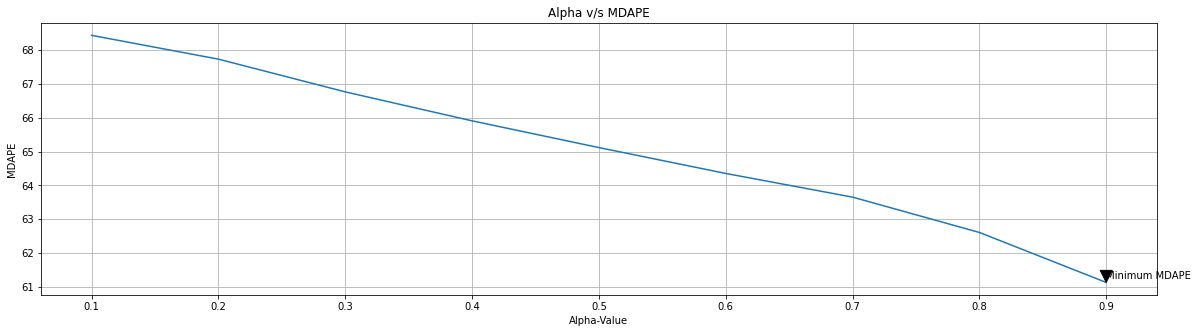

In [55]:
plt.figure(figsize=(20,5))
plt.title("Alpha v/s MDAPE")
plt.xticks(alpha_val)
plt.xlabel("Alpha-Value")
plt.ylabel("MDAPE")
plt.plot(alpha_val,mdape)
plt.grid()
ymin = min(mdape)
xpos = mdape.index(ymin)
xmax = alpha_val[xpos]
plt.annotate('Minimum MDAPE', xy=(xmax, ymin), xytext=(xmax, ymin+0.1),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

## **SAVING PREDICTIONS CORRESPONDING TO OPTIMAL ALPHA (0.9)**

In [64]:
ewma_predictions = optimal_alpha_for_ewma(total_data,[0.9])
total_data['ewma_predictions'] = ewma_predictions[0]
total_data

,Region,time_bins,num_pickups,sma_predictions,wma_predictions,ewma_predictions
0,0,0.0,80,80.0,80.000000,80.000000
1,0,1.0,89,89.0,89.000000,80.000000
2,0,2.0,76,84.5,86.000000,88.100000
3,0,3.0,65,82.5,80.333333,77.210000
4,0,4.0,59,70.5,68.666667,66.221000
...,...,...,...,...,...,...
129595,29,4315.0,12,15.5,16.000000,30.493713
129596,29,4316.0,25,14.5,13.666667,24.199371
129597,29,4317.0,22,18.5,20.666667,40.939937
129598,29,4318.0,23,23.5,23.000000,36.313994


In [65]:
actual = list(total_data['num_pickups'].values)
predicted = list(total_data['ewma_predictions'].values)
mdape = [np.median((np.abs(np.subtract(actual,predicted)/predicted))) * 100]
mdape

[15.968217688627584]

## **PLOT WITH ALL FINAL PREDICTIONS ALONG WITH GROUND TRUTH VALUES FOR ALL CLUSTERS**

In [94]:
for cnum in range(30):
  plt.figure(figsize=(30,5))
  plt.title("Plot of Predictions of All Approaches Along with Ground Truth for Cluster-{}".format(cnum))
  gt = total_data[(total_data['Region'])==cnum]['num_pickups'].values.tolist()
  sma = total_data[(total_data['Region'])==cnum]['sma_predictions'].values.tolist()
  wma = total_data[(total_data['Region'])==cnum]['wma_predictions'].values.tolist()
  ewma = total_data[(total_data['Region'])==cnum]['ewma_predictions'].values.tolist()
  plt.plot(gt,label='Ground Truth',color='red')
  plt.plot(sma,label='SMA',color='blue')
  plt.plot(wma,label='WMA',color='yellow')
  plt.plot(ewma,label='EWMA',color='green')
  plt.legend()
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

## **RESULTS**

In [95]:
from prettytable import PrettyTable
  
myTable = PrettyTable(["Technique", "MDAPE"])
  
# Add rows
myTable.add_row(["Simple Moving Average", "17.92%"])
myTable.add_row(["Weighted Moving Average", "12.90%"])
myTable.add_row(["Exponential Weighted Moving Average", "15.96%"])
print(myTable)

+-------------------------------------+--------+
|              Technique              | MDAPE  |
+-------------------------------------+--------+
|        Simple Moving Average        | 17.92% |
|       Weighted Moving Average       | 12.90% |
| Exponential Weighted Moving Average | 15.96% |
+-------------------------------------+--------+


## **WRITING THE FINAL CSV WITH PREDICTIONS WITH ALL TECHNIQUES**

In [97]:
total_data.to_csv("/content/drive/MyDrive/Cab Demand Prediction/data/data_with_all_preds.csv",index=False)